In [1]:
import numpy as np
import pandas as pd

### Importação do Conjunto de Dados

In [2]:
df = pd.read_csv('agricultural_raw_material.csv')

### Explorando o Conjunto de Dados

In [3]:
df.info
#Verificando valores nulos em cada coluna
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

### Lidar com dados ausentes, incorretos e inválidos

In [4]:
# Substituindo %, "," e "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

In [5]:
# Eliminando linhas com valores NaN
df = df.dropna()

In [6]:
# Verifica se todos os valores NaN foram resolvidos
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [7]:
# Convertendo tipo de dados para float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [8]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


### Colunas de Data e Horacolunas 
##### Formatando a coluna Datetime e definindo-a como índice para conjunto de dados

In [9]:
df.Month = pd.to_datetime(df.Month.str.upper(), format= '%b%y', yearfirst=False)
# Indexing Month
df = df.set_index('Month')
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


#### Análise Exploratória e Visualização

##### Vamos começar importando **matplotlib.pyplot e seaborn**

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de Calor**

<function matplotlib.pyplot.show(close=None, block=None)>

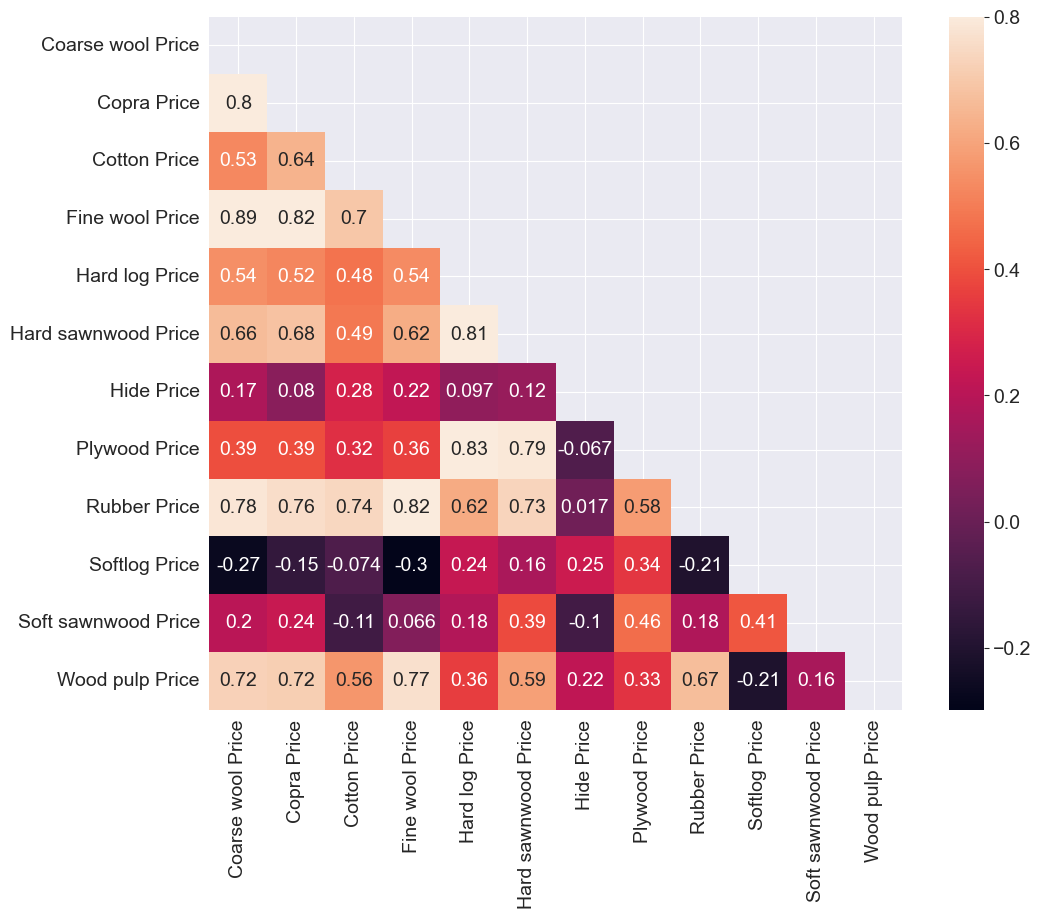

In [11]:
# raw-materials list
raw_data=['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 
'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#getting the correlation matix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize=(12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax= .8, mask=mask, square= True, annot= True)
plt.show

**O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente**

#### Explore uma ou mais colunas traçando um gráfico abaixo e adicione alguma explicação sobre ele Matriz de correlação


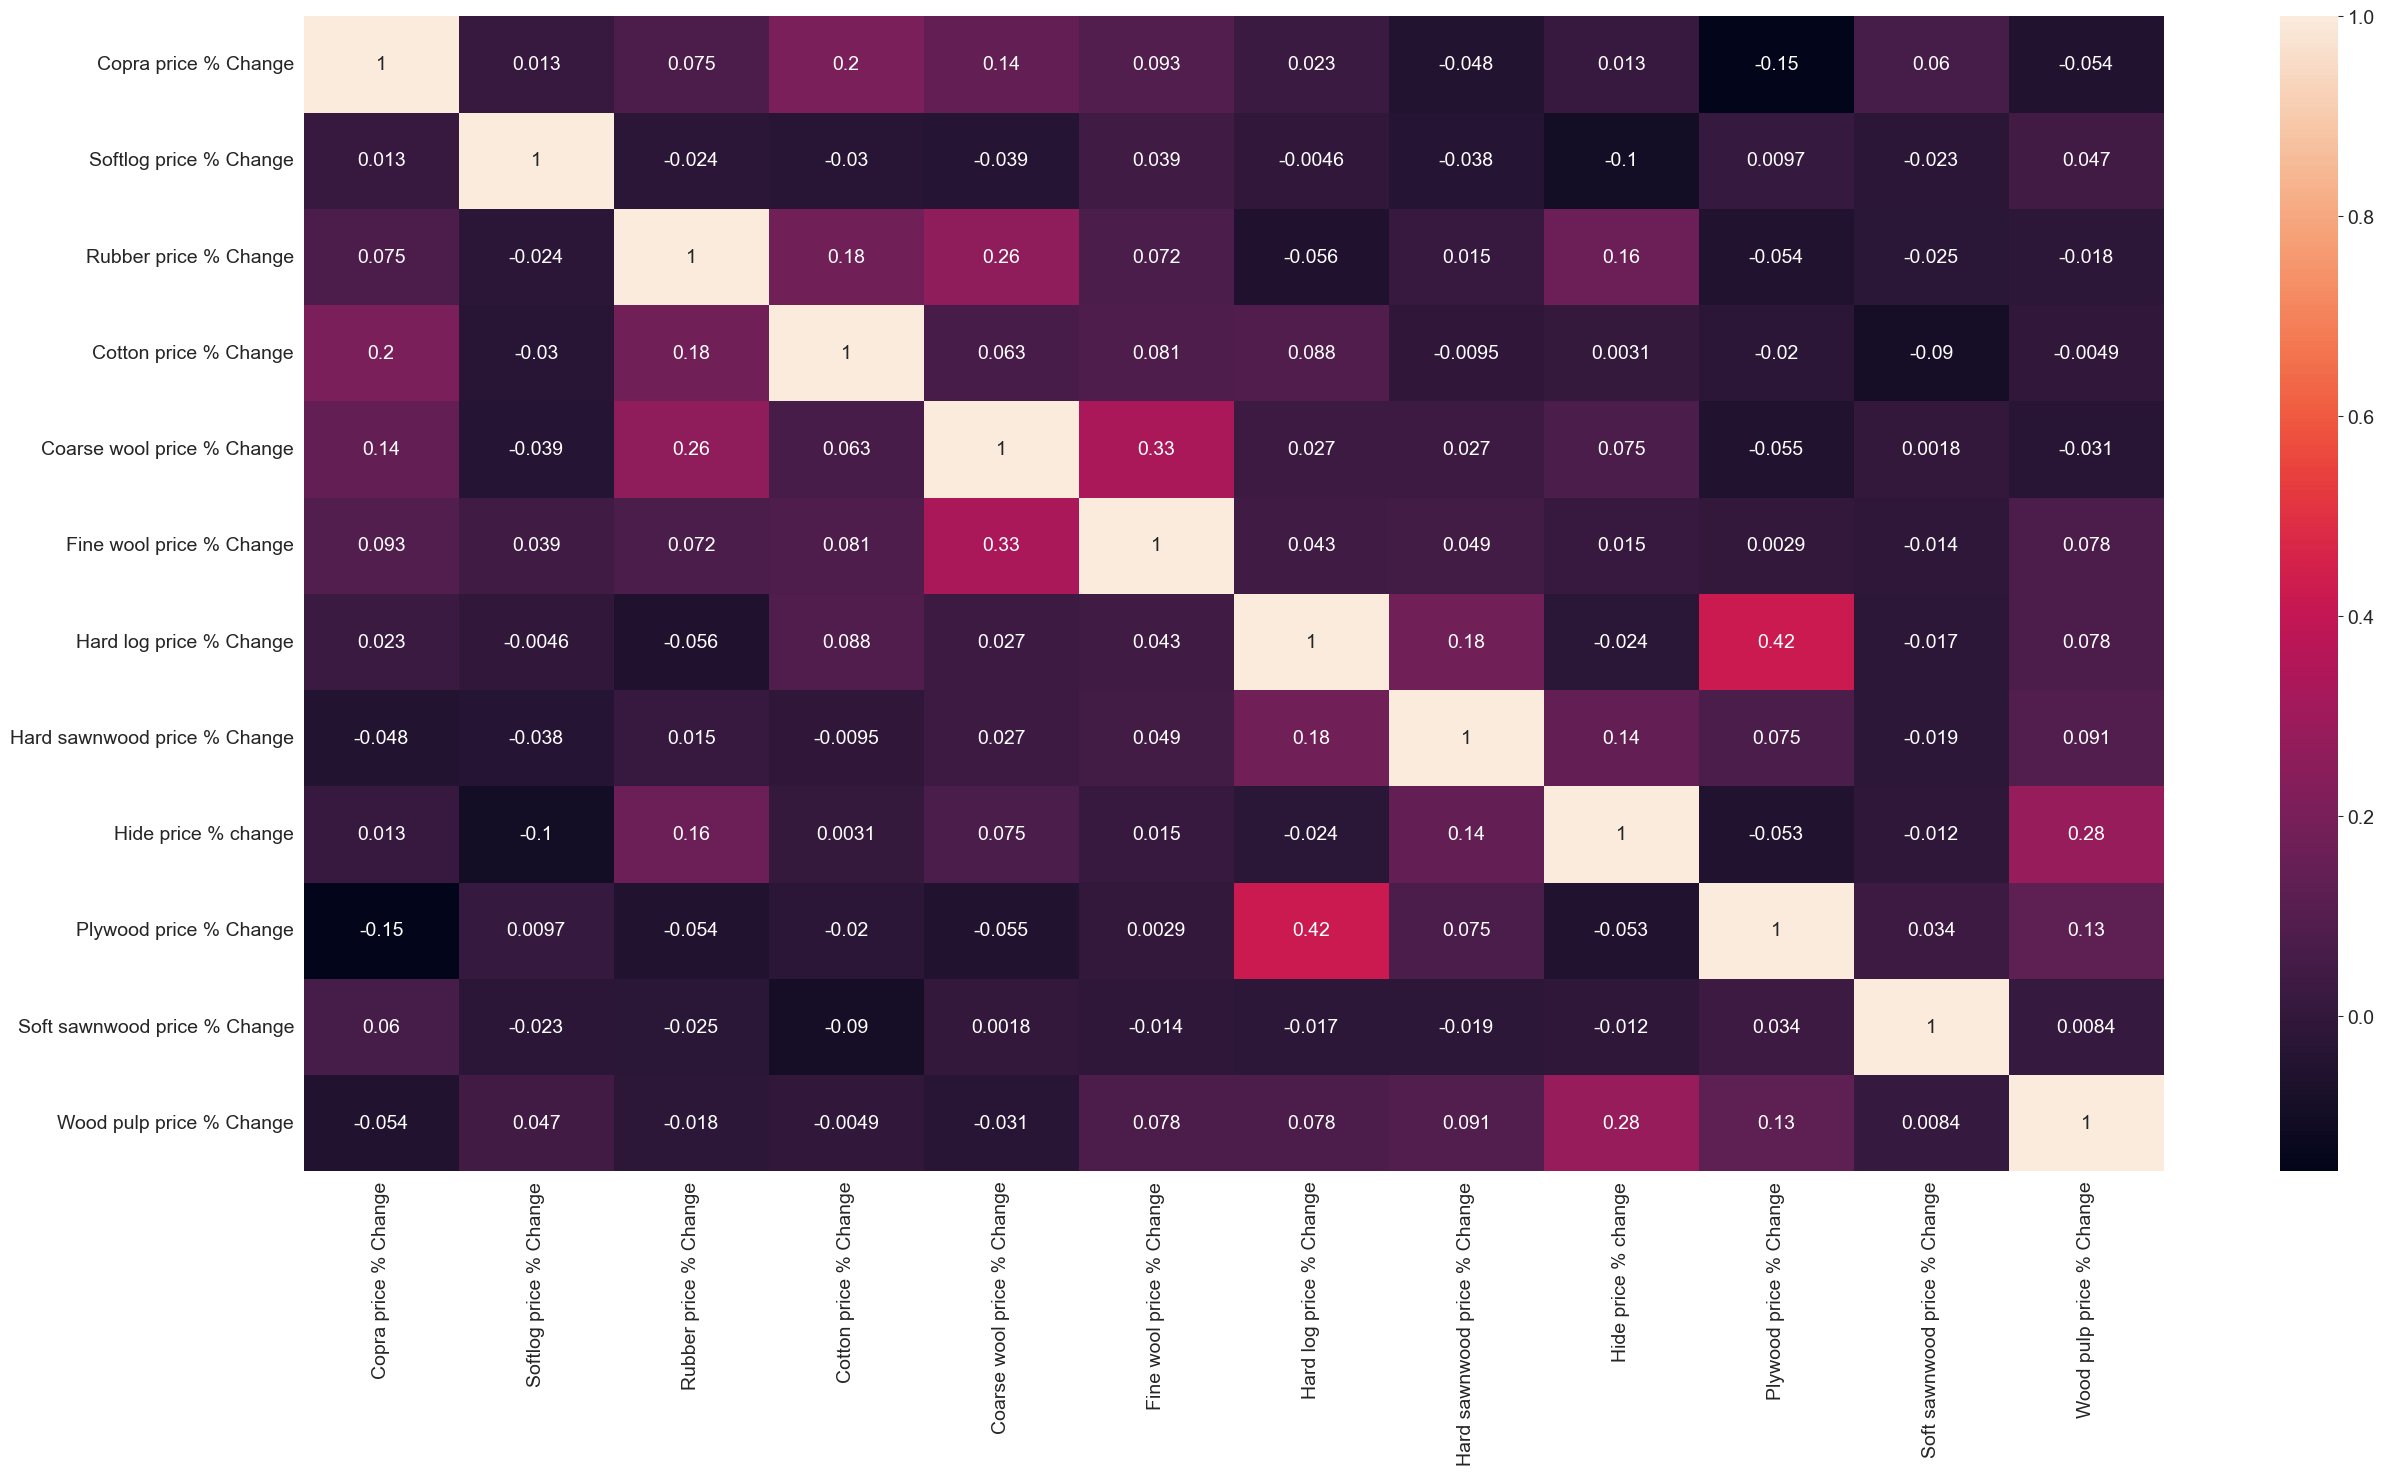

In [12]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas
o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
Zero implica nenhuma relação
caso contrário, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança

#### Lã grossa

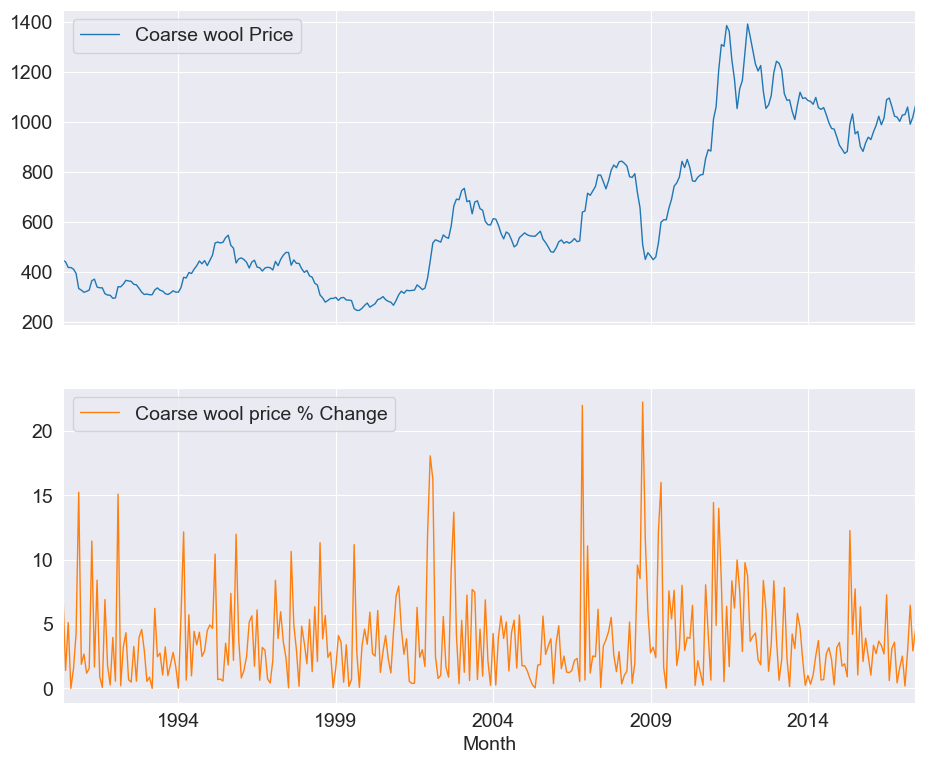

In [13]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

# esse código cria um gráfico usando duas colunas específicas do DataFrame df, com a primeira coluna representando os preços e a segunda coluna representando as mudanças percentuais nos preços. Os gráficos são dispostos em subgráficos separados e a largura da linha é definida como 1.

##### Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

### Fazendo e Respondendo Perguntas

**Q1: Descubra a variação normal do preço de cada matéria-prima**

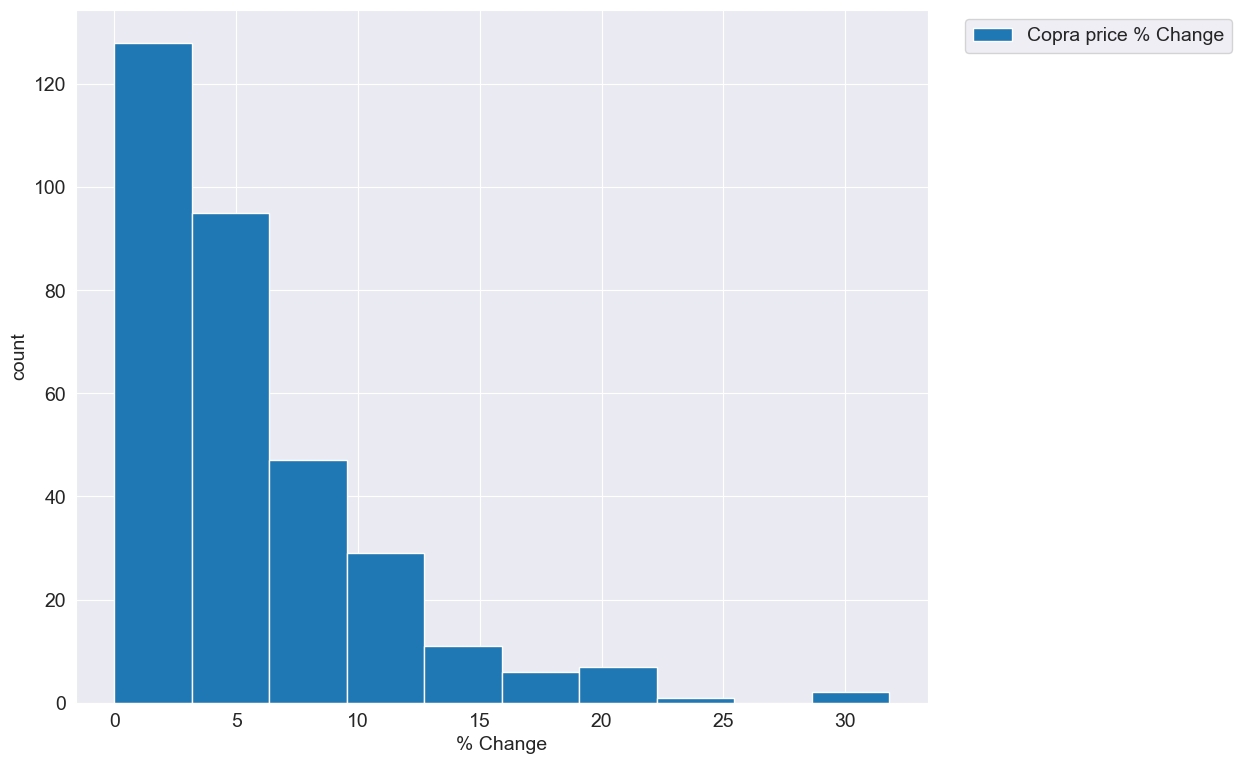

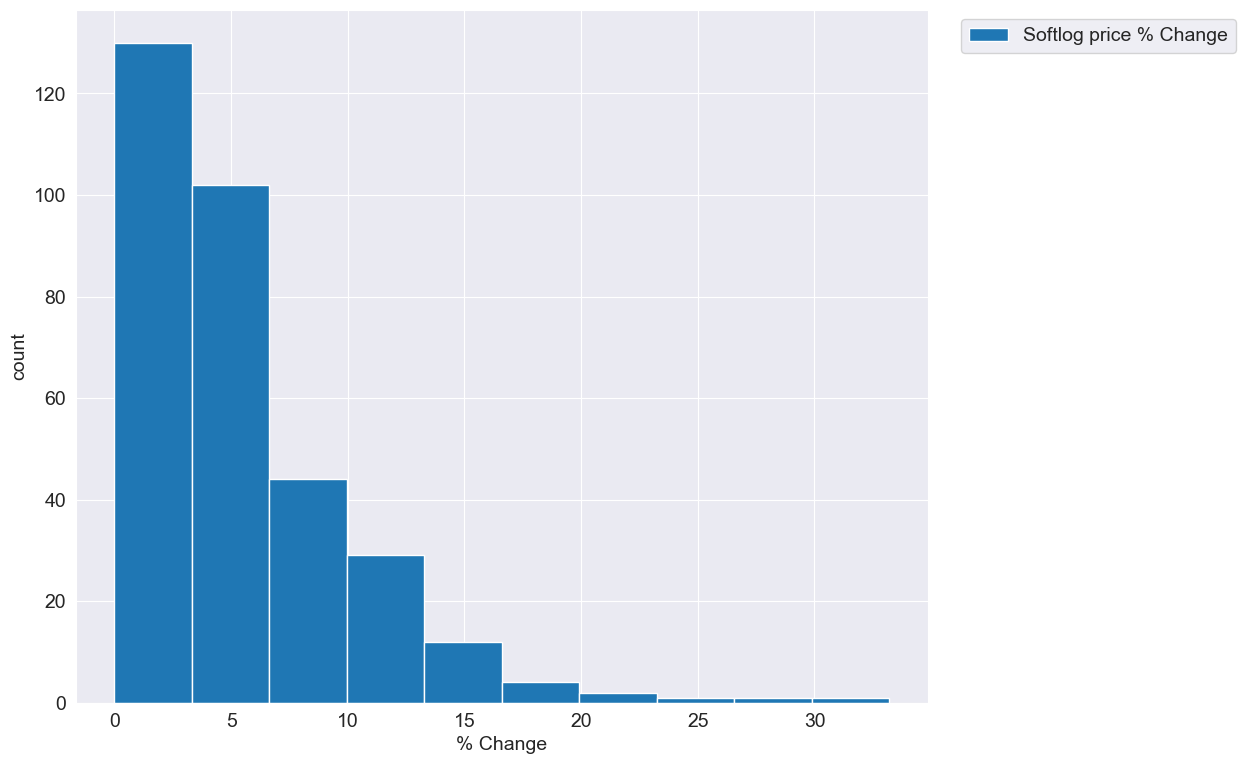

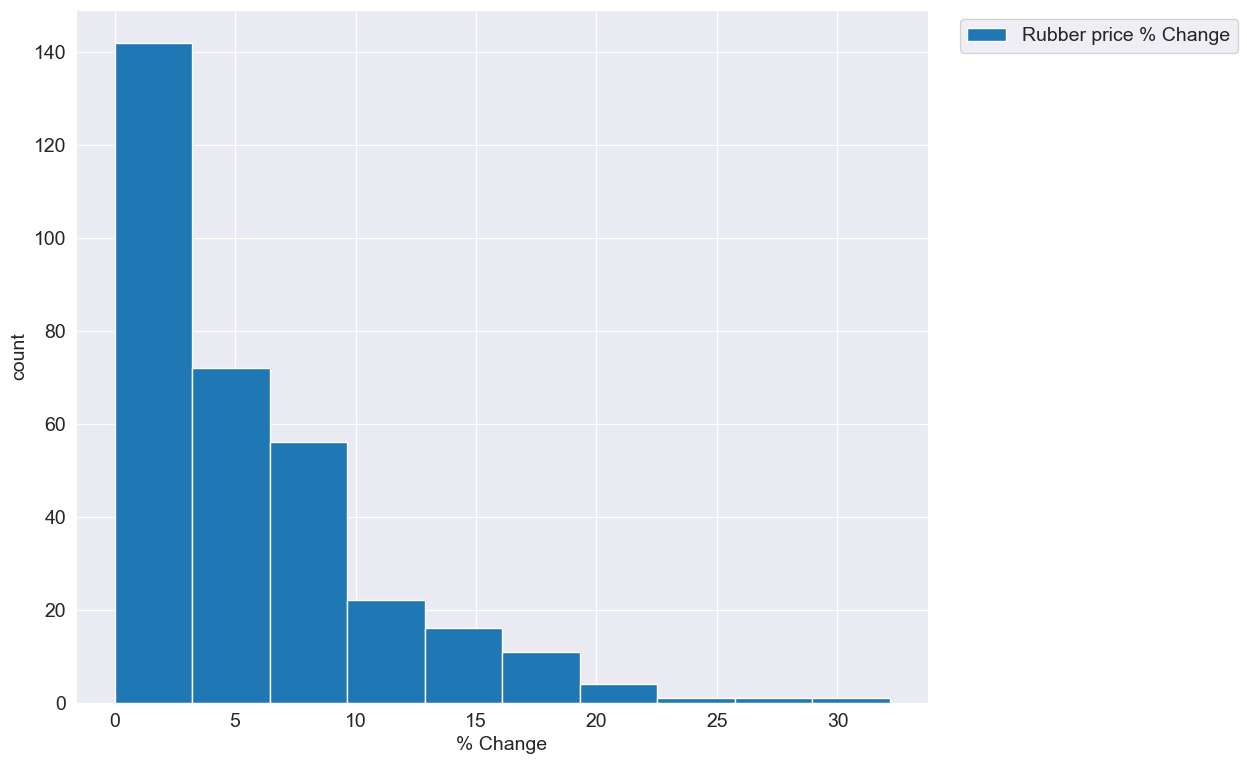

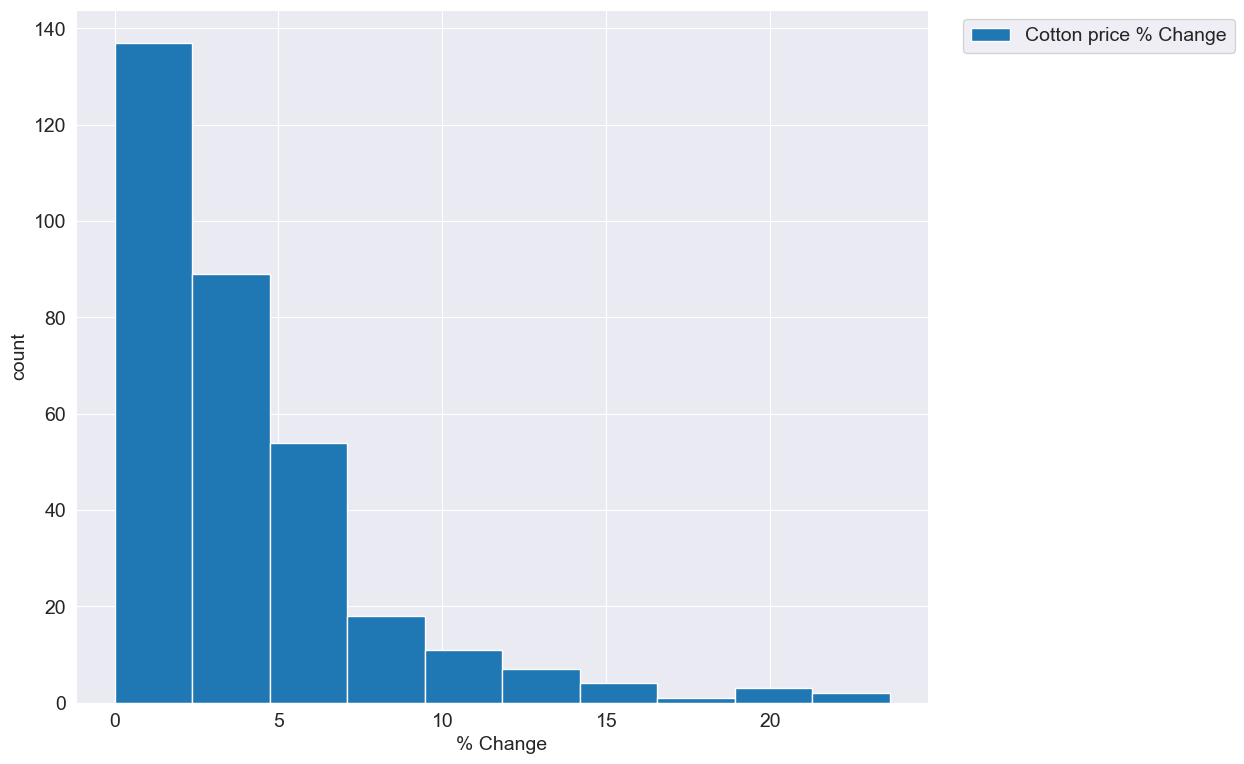

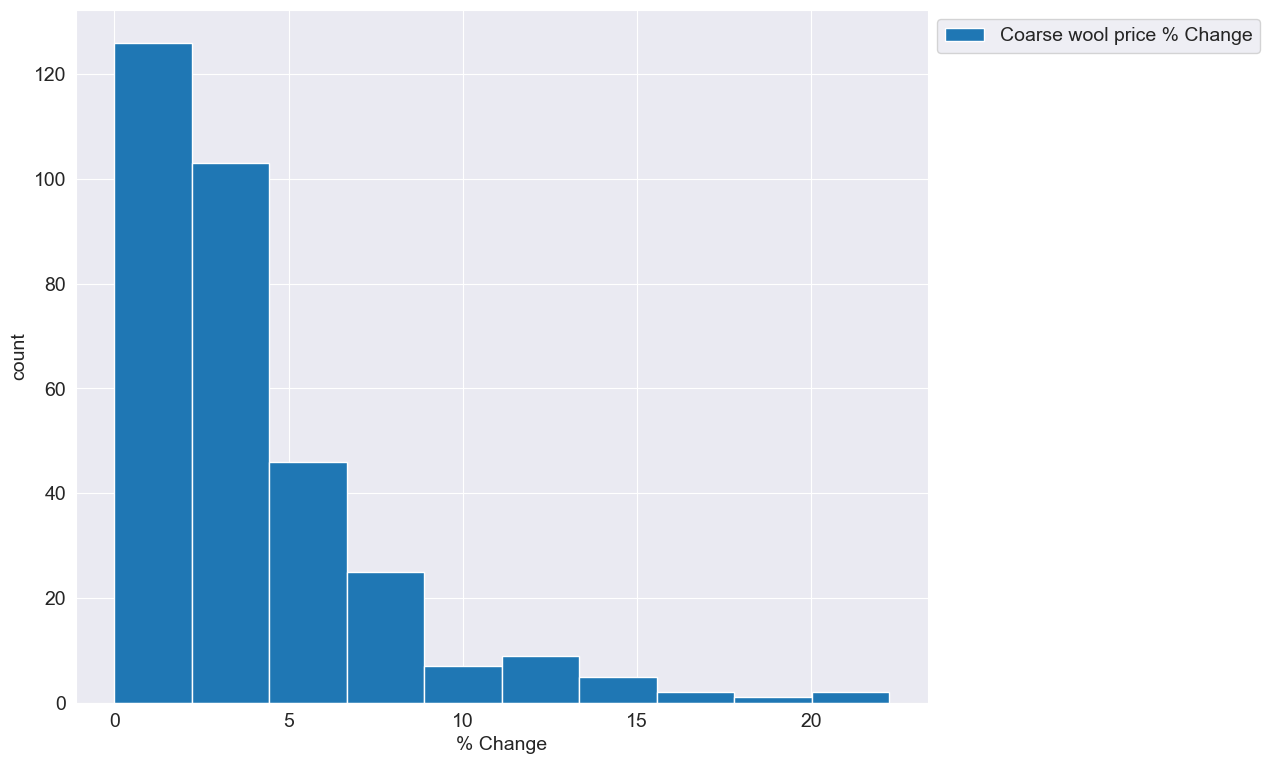

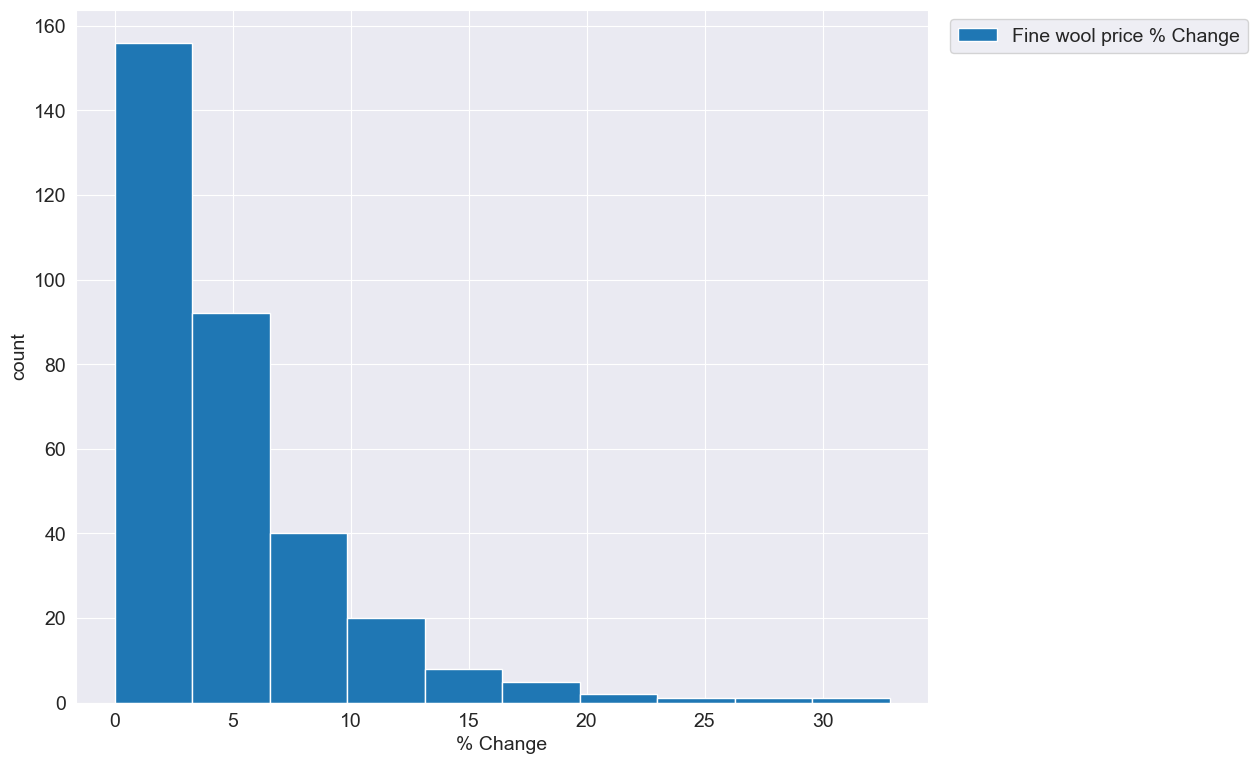

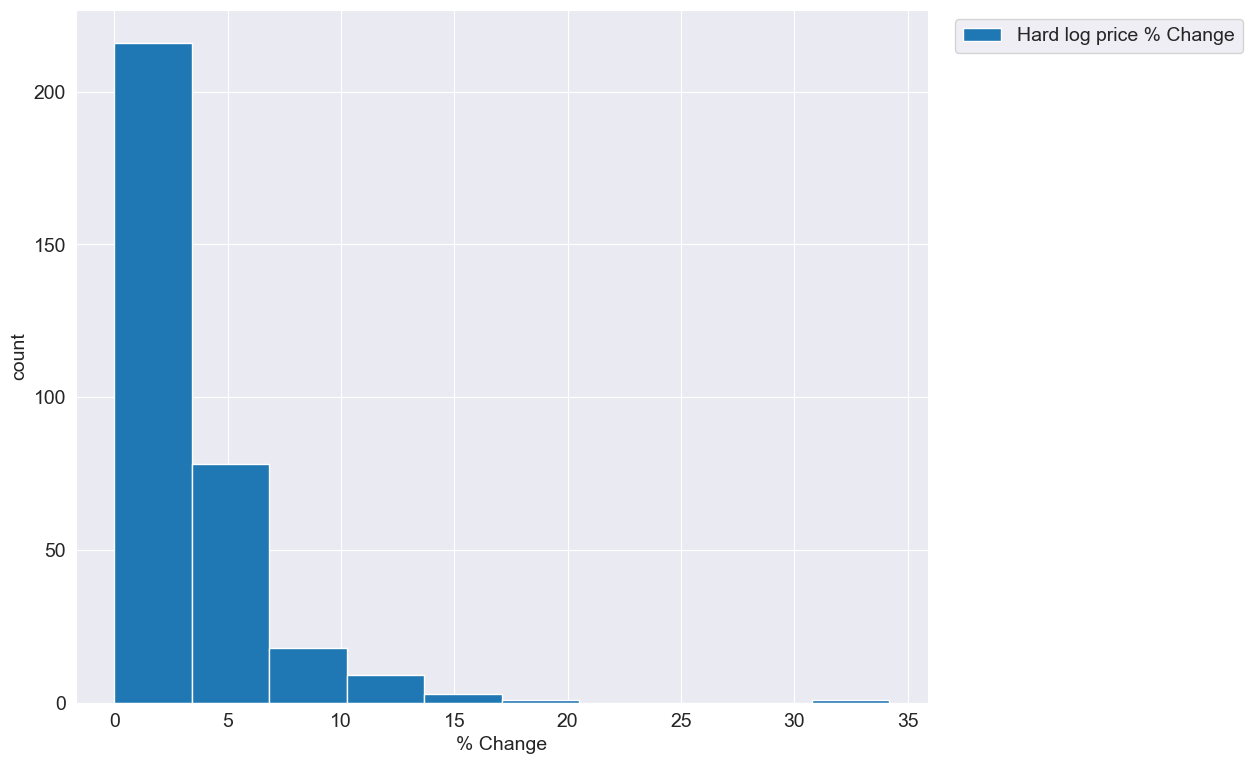

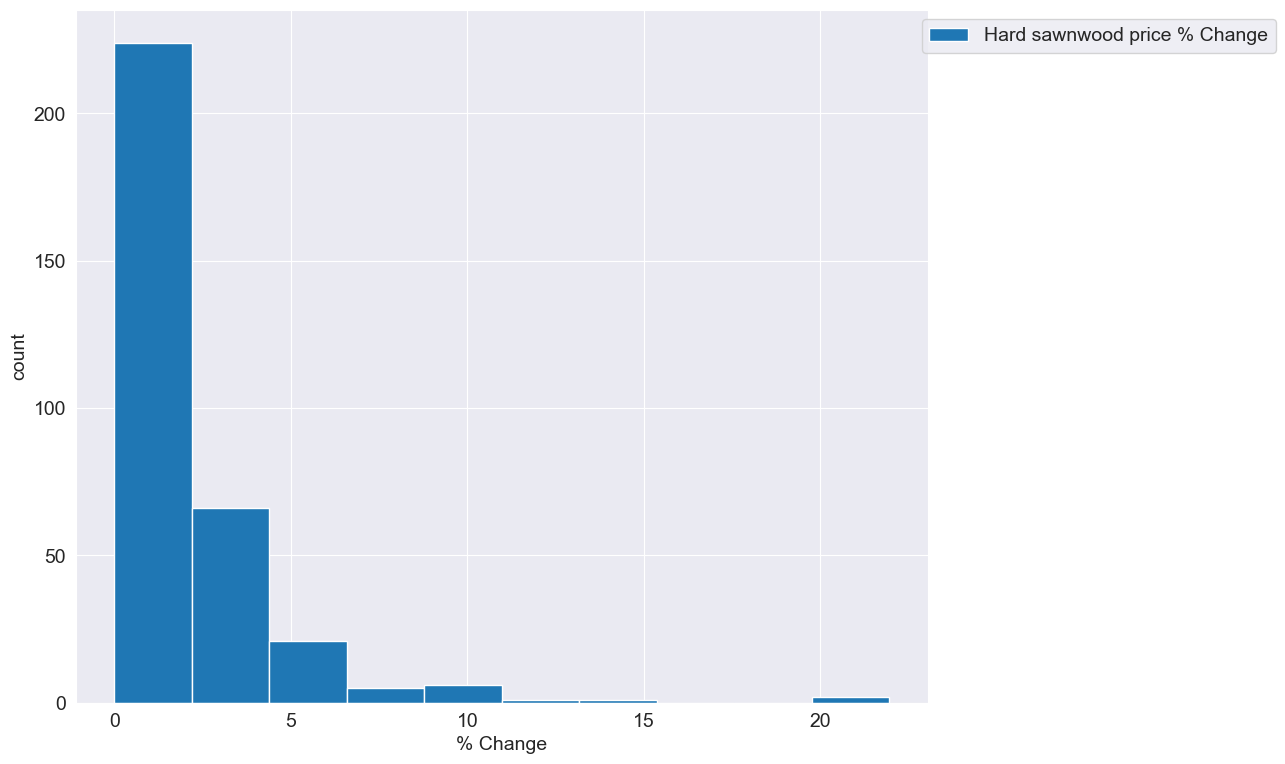

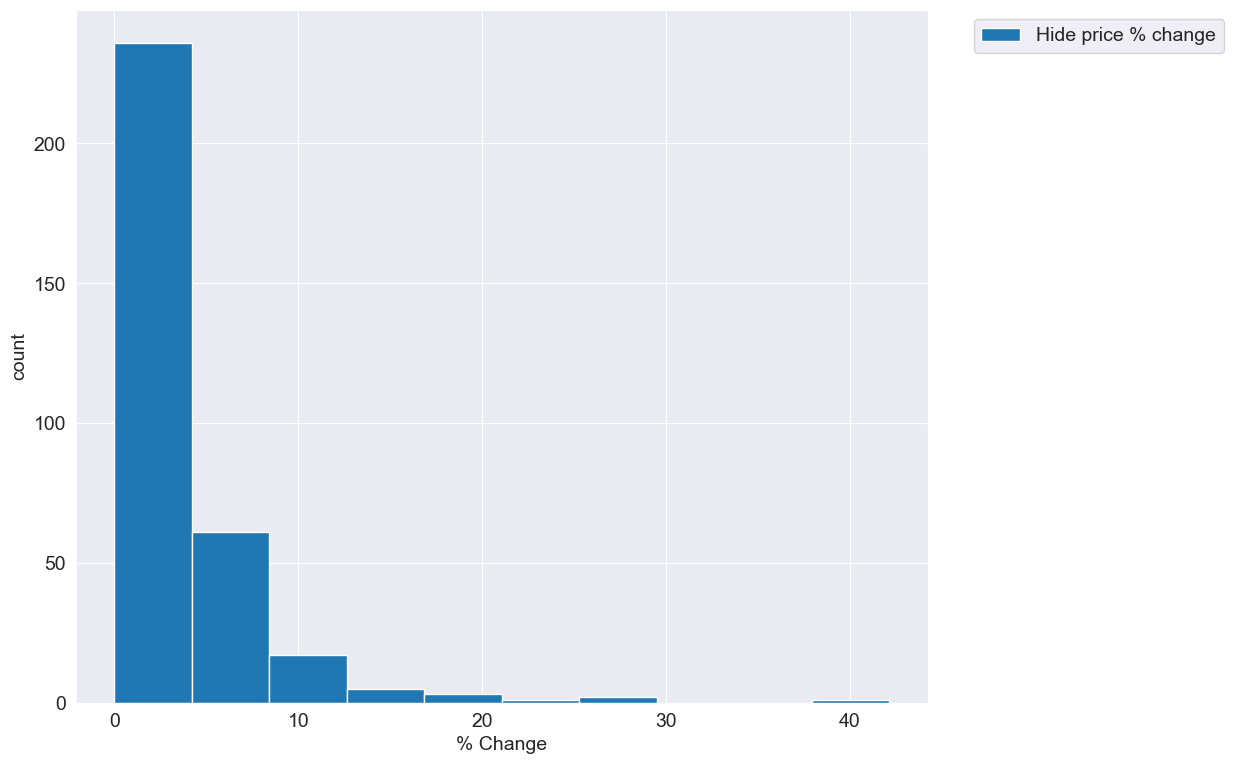

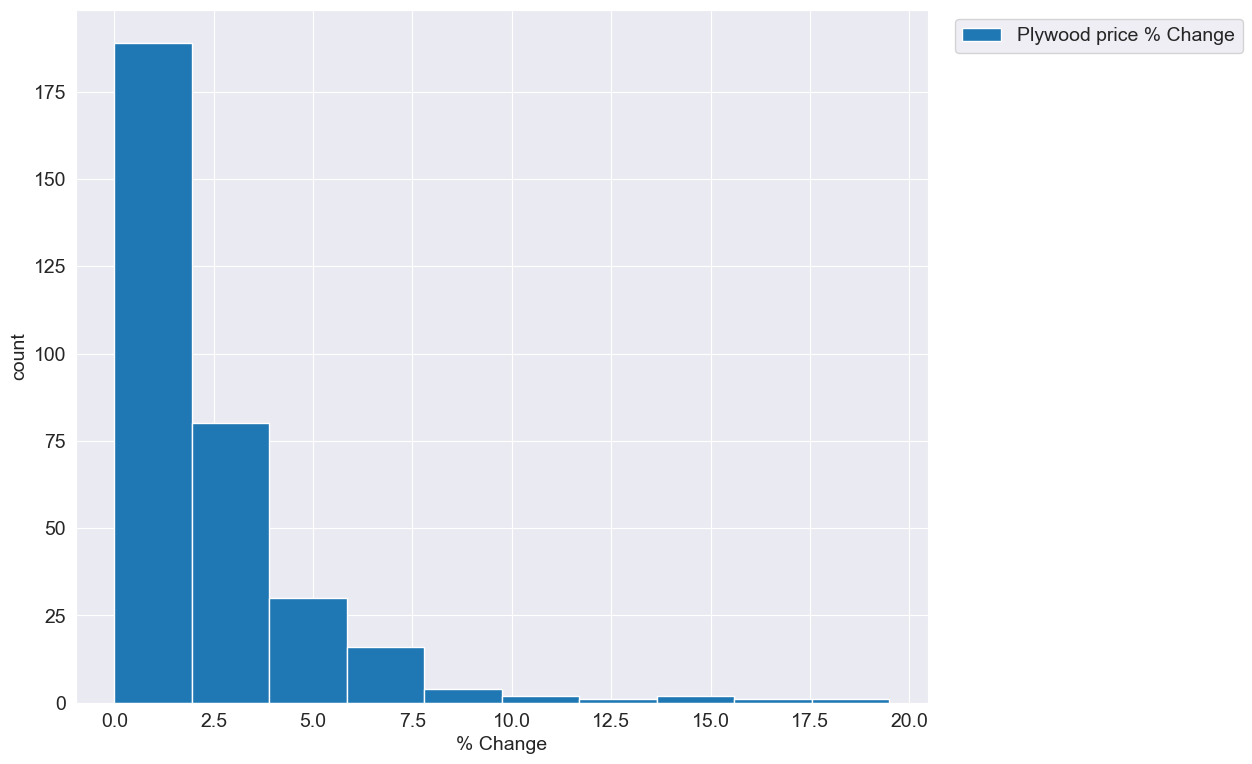

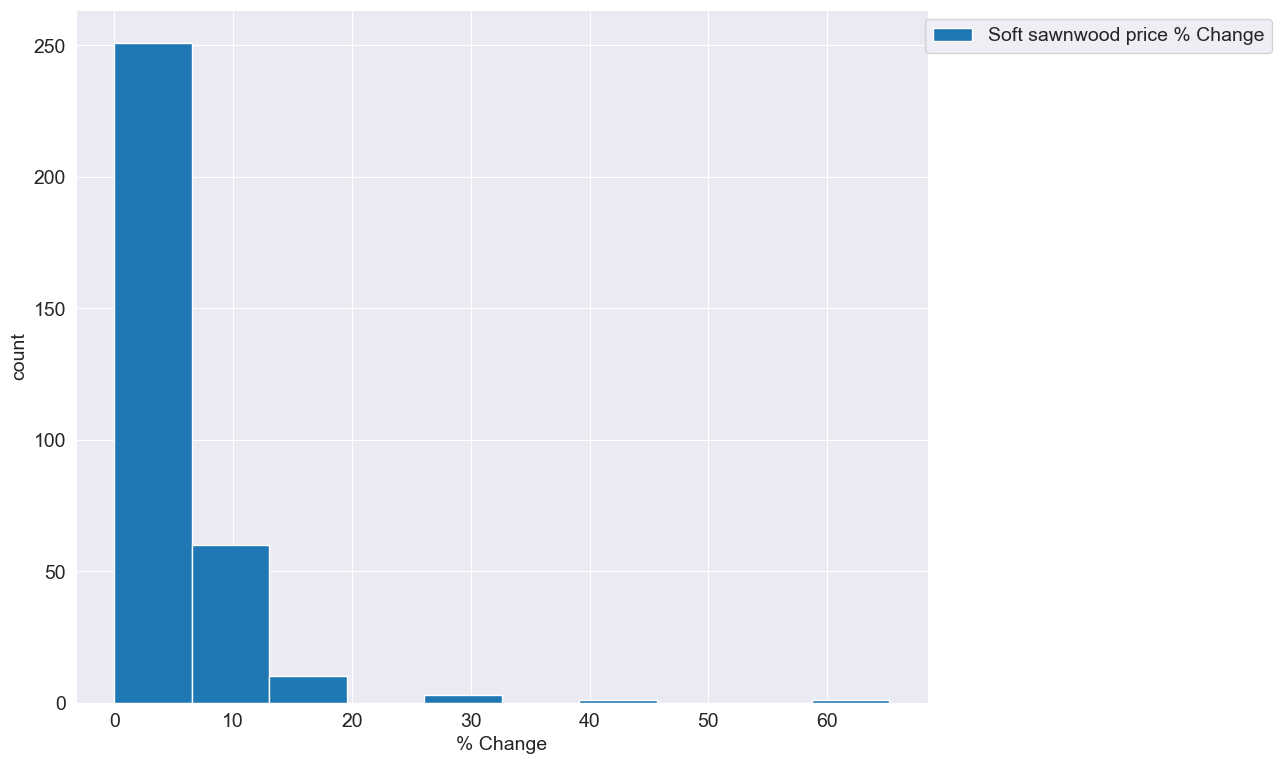

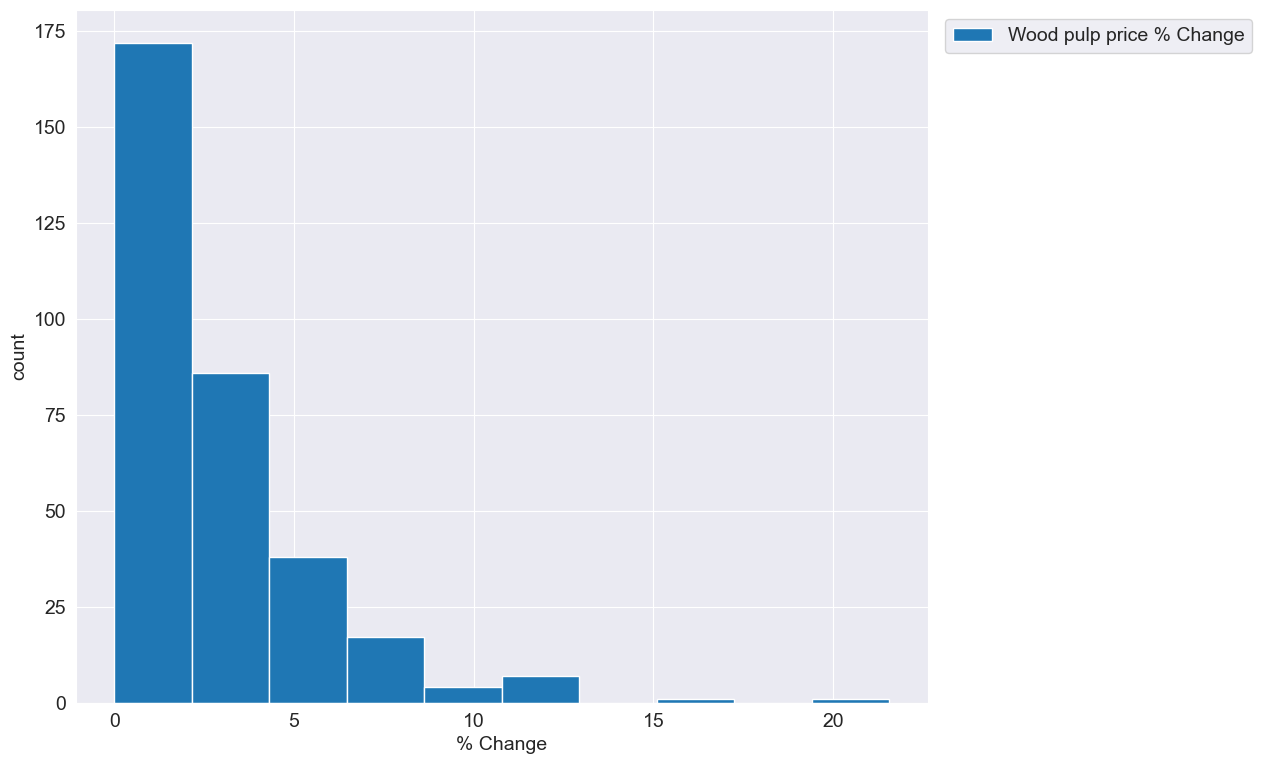

In [15]:
# df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

# Lista de matérias-primas para as quais serão gerados histogramas de mudanças percentuais.
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']

# Loop para iterar sobre cada matéria-prima na lista e gerar histogramas.
for i in range(len(changelist)):
    # Cria uma nova figura para cada matéria-prima.
    plt.figure(figsize=(12,12))
    
    # Gera um histograma para a mudança percentual da matéria-prima atual.
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    
    # Adiciona rótulos ao eixo x e y.
    plt.xlabel('% Change')
    plt.ylabel('count')
    
    # Adiciona uma legenda começando pela matéria-prima atual.
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2,1))


##### Podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

**Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Raw-Materials price comparision')

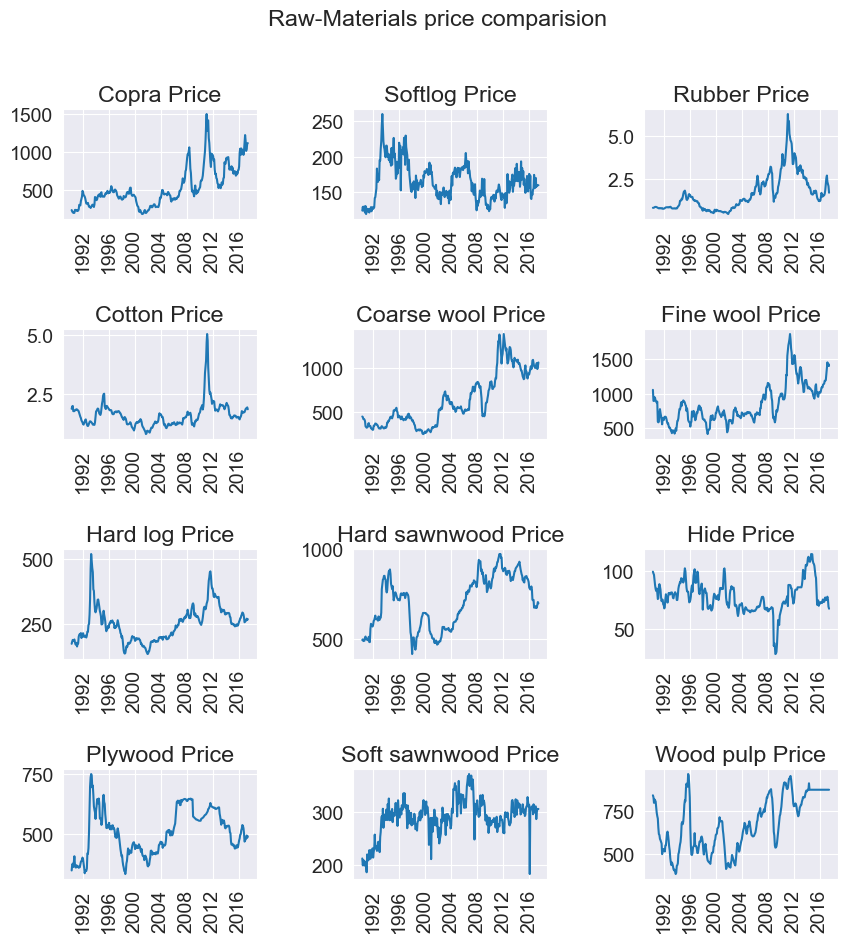

In [16]:
# Cria uma nova figura com tamanho de 10x10 polegadas.
plt.figure(figsize=(10, 10))

# Lista de nomes de matérias-primas para as quais será gerado um gráfico.
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']

# Loop para iterar sobre cada matéria-prima na lista e gerar subgráficos.
for i in range(len(materialslist)):
    # Adiciona um subgráfico (subplot) na posição i+1 (iniciando a contagem de 1).
    plt.subplot(4,3,i+1)
    
    # Ajusta o espaçamento vertical e horizontal entre os subgráficos.
    plt.subplots_adjust(hspace=1, wspace=0.5)
    
    # Adiciona um título ao subgráfico com o nome da matéria-prima.
    plt.title(materialslist[i])
    
    # Plota a série temporal da matéria-prima atual no subgráfico.
    plt.plot(df[materialslist[i]])
    
    # Rotaciona os rótulos do eixo x em 90 graus para melhorar a legibilidade.
    plt.xticks(rotation=90)

# Adiciona um título geral para a figura.
plt.suptitle("Raw-Materials price comparision")

##### Podemos ver que o algodão e a borracha são de preços mais baixos. Vamos comparar os preços para entender melhor qual é o mais baixo

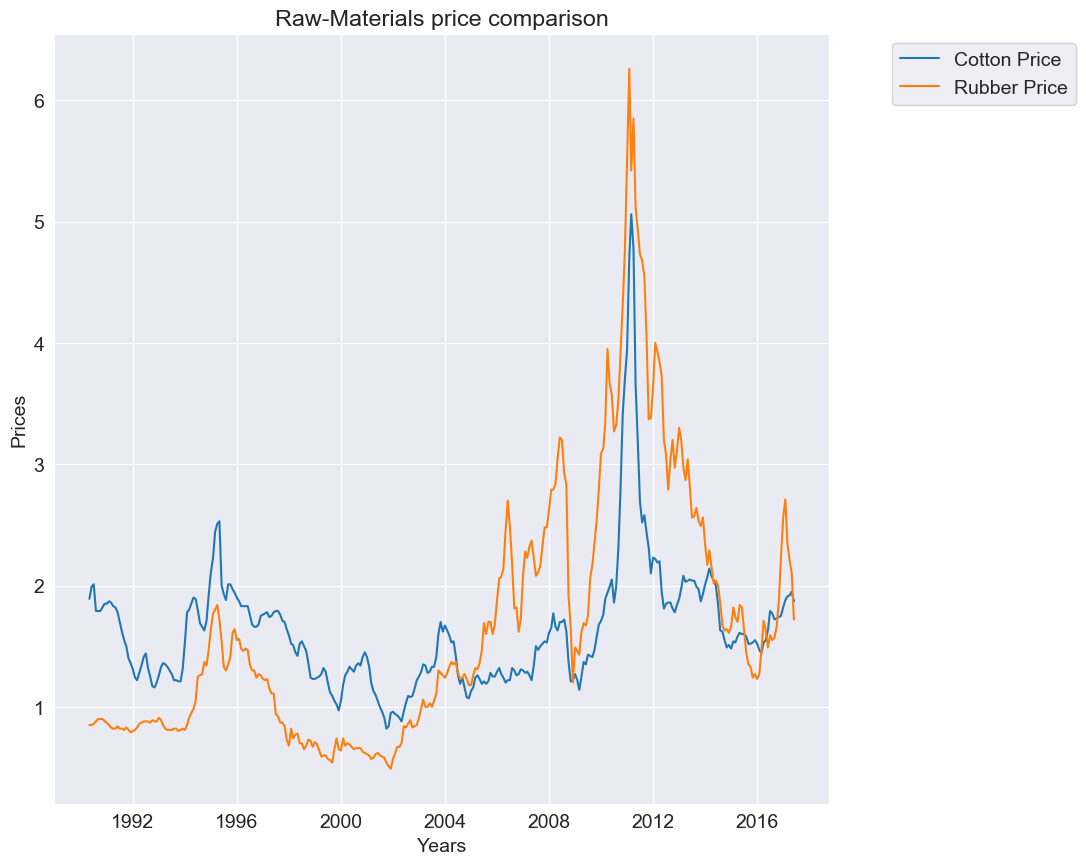

In [17]:
# Cria uma nova figura com tamanho de 10x10 polegadas.
plt.figure(figsize=(10, 10))

# Plota as séries temporais de 'Cotton Price' e 'Rubber Price' no mesmo gráfico.
plt.plot(df[['Cotton Price','Rubber Price']])

# Adiciona um título ao gráfico.
plt.title("Raw-Materials price comparison")

# Adiciona rótulos aos eixos x e y.
plt.xlabel('Years')
plt.ylabel('Prices')

# Adiciona uma legenda indicando as séries temporais representadas no gráfico.
plt.legend(['Cotton Price','Rubber Price'], loc='upper center', bbox_to_anchor=(1.2, 1))
